<a href="https://colab.research.google.com/github/codecx07/FocusPrismDS/blob/master/FocusPrismDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import neccassary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.layers.core import Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [0]:
# Link Google drive with Colab Notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download files from Google Drive to Colab Notebook
id = '1IIi_ybEe28nurRDsEp8d1hKN9F6HUFvF'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
train_X = pd.read_csv('Filename.csv')

id = '1_TaPIaLZRUm5BoJt7zkufIFqDw1hvZ92'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
train_y = pd.read_csv('Filename.csv')

id = '1q9FWyeP_vB--HN_RI5PyMnH3ALoIvZdS'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
test = pd.read_csv('Filename.csv')

In [32]:
print(train_X.shape)
train_X.head()

(2711, 23)


,Unnamed: 0,X_follower_count,X_following_count,X_listed_count,X_mentions_received,X_retweets_received,X_mentions_sent,X_retweets_sent,X_posts,X_network_feature_1,...,Y_following_count,Y_listed_count,Y_mentions_received,Y_retweets_received,Y_mentions_sent,Y_retweets_sent,Y_posts,Y_network_feature_1,Y_network_feature_2,Y_network_feature_3
0,0,4981,2026,170,57.856207,18.718991,3.523850,1.630532,5.137533,118,...,1216,90,0.201007,0.201007,2.118130,0.683873,1.635264,10,20.000000,30.000000
1,1,45639,902,2661,297.708558,73.997768,55.763536,6.666984,47.722563,561,...,442,12158,1675.160105,187.139696,15.242519,5.218120,9.732542,2607,41.289101,1967.639388
2,2,1259726,377,6129,1817.298643,422.667342,24.043562,15.131286,25.584763,3376,...,509,36,0.201007,0.201007,0.201007,0.201007,0.201007,10,20.000000,30.000000
3,3,33719,29367,903,256.829708,47.839261,13.112510,0.679044,24.584411,238,...,932,52,2.673828,0.724300,2.118425,0.674264,1.645168,14,20.000000,98.500000
4,4,1834057,813,30642,3348.533818,776.852854,58.663704,14.616587,35.319419,6271,...,2134,207,13.394731,2.851357,8.967214,2.665909,7.547107,39,99.206897,2876.793103


In [0]:
del(train_X['Unnamed: 0'])

In [34]:
print(train_X.columns)
train_X.describe()

Index(['X_follower_count', 'X_following_count', 'X_listed_count',
       'X_mentions_received', 'X_retweets_received', 'X_mentions_sent',
       'X_retweets_sent', 'X_posts', 'X_network_feature_1',
       'X_network_feature_2', 'X_network_feature_3', 'Y_follower_count',
       'Y_following_count', 'Y_listed_count', 'Y_mentions_received',
       'Y_retweets_received', 'Y_mentions_sent', 'Y_retweets_sent', 'Y_posts',
       'Y_network_feature_1', 'Y_network_feature_2', 'Y_network_feature_3'],
      dtype='object')


,X_follower_count,X_following_count,X_listed_count,X_mentions_received,X_retweets_received,X_mentions_sent,X_retweets_sent,X_posts,X_network_feature_1,X_network_feature_2,...,Y_following_count,Y_listed_count,Y_mentions_received,Y_retweets_received,Y_mentions_sent,Y_retweets_sent,Y_posts,Y_network_feature_1,Y_network_feature_2,Y_network_feature_3
count,2.711000e+03,2711.000000,2711.000000,2.711000e+03,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,...,2711.000000,2711.000000,2.711000e+03,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000
mean,6.609561e+05,11415.536702,5868.202877,5.013243e+03,1995.226273,12.073984,2.258728,17.721047,5373.161933,102.674442,...,12311.983401,5613.893766,4.855150e+03,1897.707150,12.276253,2.229638,19.377076,4982.868314,103.295591,3765.772947
std,2.055452e+06,45084.182144,15724.514284,4.951883e+04,18621.981615,19.310537,3.927934,34.554545,26426.635091,102.815309,...,49508.556056,14877.996780,4.984731e+04,18630.050682,19.497167,3.877337,38.115574,26232.690851,100.924120,5493.171798
min,6.900000e+01,40.000000,20.000000,2.010067e-01,0.201007,0.201007,0.201007,0.201007,10.000000,20.000000,...,40.000000,20.000000,2.010067e-01,0.201007,0.201007,0.201007,0.201007,10.000000,20.000000,30.000000
25%,2.701000e+03,360.000000,105.000000,6.907297e+00,1.508178,0.713887,0.201007,1.650386,21.000000,34.555556,...,353.000000,92.000000,6.620151e+00,1.433632,0.713887,0.201007,1.647777,21.000000,35.176568,1236.500000
50%,4.407700e+04,813.000000,910.000000,9.706054e+01,27.580241,4.599332,0.683873,7.110388,198.000000,73.488804,...,791.000000,962.000000,9.753083e+01,28.322080,4.346483,0.683873,7.110388,205.000000,74.925234,2236.420734
75%,3.665100e+05,2844.000000,6754.000000,6.930950e+02,213.757410,13.892467,2.665909,20.433063,1290.000000,127.431818,...,2839.000000,6734.000000,6.996393e+02,214.162042,13.892467,2.641362,21.493677,1333.000000,132.191489,4420.379310
max,3.654324e+07,550784.000000,549164.000000,2.290438e+06,871651.748482,153.619029,27.734305,386.144836,920848.000000,1141.000000,...,664364.000000,549164.000000,2.290438e+06,871651.748482,153.619029,32.581080,386.144836,920848.000000,860.666667,62416.916667


In [35]:
train_X.corr()

,X_follower_count,X_following_count,X_listed_count,X_mentions_received,X_retweets_received,X_mentions_sent,X_retweets_sent,X_posts,X_network_feature_1,X_network_feature_2,...,Y_following_count,Y_listed_count,Y_mentions_received,Y_retweets_received,Y_mentions_sent,Y_retweets_sent,Y_posts,Y_network_feature_1,Y_network_feature_2,Y_network_feature_3
X_follower_count,1.000000,0.121748,0.823319,0.460628,0.477103,0.015555,0.093626,0.041972,0.602752,-0.158405,...,0.026202,0.051886,0.017096,0.022228,-0.011048,-0.024286,-0.009255,0.040369,-0.024649,0.001217
X_following_count,0.121748,1.000000,0.111528,0.054163,0.044484,0.154259,-0.078198,0.140900,0.039994,0.063789,...,-0.010962,-0.001009,-0.000451,-0.002227,-0.013576,0.001225,-0.016101,-0.001717,-0.013611,-0.012437
X_listed_count,0.823319,0.111528,1.000000,0.677021,0.693243,0.056651,0.153261,0.045815,0.659630,-0.082792,...,0.023867,0.070743,0.013672,0.019107,0.005148,0.006600,0.005875,0.039876,-0.027135,-0.000422
X_mentions_received,0.460628,0.054163,0.677021,1.000000,0.985343,0.020393,0.045308,0.027735,0.901040,-0.067853,...,0.021608,0.043886,0.003570,0.006534,-0.004740,-0.022121,-0.010759,0.018250,-0.025391,-0.015723
X_retweets_received,0.477103,0.044484,0.693243,0.985343,1.000000,0.013789,0.035645,0.033815,0.914511,-0.073492,...,0.022688,0.045810,0.002973,0.006548,-0.004858,-0.021189,-0.010410,0.018471,-0.025407,-0.015813
X_mentions_sent,0.015555,0.154259,0.056651,0.020393,0.013789,1.000000,0.588267,0.650366,0.025528,0.071253,...,0.043242,0.002351,-0.004446,-0.000241,0.033514,0.015172,0.049554,-0.003040,0.008769,0.004534
X_retweets_sent,0.093626,-0.078198,0.153261,0.045308,0.035645,0.588267,1.000000,0.405486,0.075643,-0.045009,...,0.031117,-0.001108,-0.008124,-0.001603,0.042878,0.018691,0.073709,0.004037,-0.011756,-0.008264
X_posts,0.041972,0.140900,0.045815,0.027735,0.033815,0.650366,0.405486,1.000000,0.070297,-0.060693,...,0.025611,-0.009063,-0.007441,-0.001718,0.019084,-0.003069,0.035660,-0.004575,0.010528,0.006416
X_network_feature_1,0.602752,0.039994,0.659630,0.901040,0.914511,0.025528,0.075643,0.070297,1.000000,-0.130249,...,0.051349,0.060074,0.003908,0.007946,0.000755,-0.026630,-0.008081,0.022200,-0.028932,-0.016710
X_network_feature_2,-0.158405,0.063789,-0.082792,-0.067853,-0.073492,0.071253,-0.045009,-0.060693,-0.130249,1.000000,...,0.006128,-0.031566,-0.006831,-0.010640,-0.022492,-0.023572,-0.007524,-0.015359,0.006399,-0.003313


In [36]:
print(train_y.shape)
train_y.head()

(2711, 2)


,Unnamed: 0,X_social_than_Y?
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


In [0]:
del(train_y['Unnamed: 0'])

In [38]:
train_y.describe()

,X_social_than_Y?
count,2711.000000
mean,0.505349
std,0.500064
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [39]:
print(test.shape)
test.head()

(1163, 23)


,Unnamed: 0,X_follower_count,X_following_count,X_listed_count,X_mentions_received,X_retweets_received,X_mentions_sent,X_retweets_sent,X_posts,X_network_feature_1,...,Y_following_count,Y_listed_count,Y_mentions_received,Y_retweets_received,Y_mentions_sent,Y_retweets_sent,Y_posts,Y_network_feature_1,Y_network_feature_2,Y_network_feature_3
0,0,539,513,36,4.431447,1.076244,0.201007,0.201007,0.724300,20,...,135,43610,24946.300128,19194.002146,10.647895,2.707247,16.532477,46916,27.320320,868.486589
1,1,146348,49306,9412,292.622453,168.902038,2.616711,0.201007,8.071652,610,...,765,13695,2840.876081,1147.185391,5.614884,1.720714,18.057437,4980,103.036875,4554.141554
2,2,5342890,33441,19735,347272.477900,104699.348415,22.817679,3.305800,26.970532,213728,...,404,6994,1303.530268,340.306289,9.603840,0.683873,14.108088,2345,79.589006,1870.874419
3,3,10320,5665,628,149.075931,69.497412,0.201007,0.201007,6.637291,236,...,898,1256,494.477491,148.206984,6.063391,3.633492,42.351392,1007,52.902778,1901.071429
4,4,678,961,26,7.887697,1.237180,9.539859,1.740272,5.906474,18,...,2154,1684,77.625619,28.322080,15.037798,1.675883,10.020357,178,399.311765,32050.811765


In [0]:
del(test['Unnamed: 0'])

In [41]:
# Checking if it is a skew dataset?
train_y['X_social_than_Y?'].value_counts()

1    1370
0    1341
Name: X_social_than_Y?, dtype: int64

In [42]:
# Adding features that seem helpful for classification
train_X = pd.concat(
    [
        train_X,
        pd.DataFrame(
            [[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]], 
            index=train_X.index, 
            columns=['XY_follower_count', 'XY_following_count', 'XY_listed_count',
                     'XY_mentions_received', 'XY_retweets_received', 'XY_mentions_sent',
                     'XY_retweets_sent', 'XY_posts', 'XY_network_feature_1',
                     'XY_network_feature_2', 'XY_network_feature_3']
        )
    ], axis=1
)
test = pd.concat(
    [
        test,
        pd.DataFrame(
            [[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]], 
            index=test.index, 
            columns=['XY_follower_count', 'XY_following_count', 'XY_listed_count',
                     'XY_mentions_received', 'XY_retweets_received', 'XY_mentions_sent',
                     'XY_retweets_sent', 'XY_posts', 'XY_network_feature_1',
                     'XY_network_feature_2', 'XY_network_feature_3']
        )
    ], axis=1
)
print(train_X.shape)
print(test.shape)

(2711, 33)
(1163, 33)


In [0]:
# Adding the above mentioned features as followes : XY_attribute = X_attribute / Y_attribute
for i in range(int(len(train_X.columns) / 3)):
  train_X.iloc[:, i + 22] = train_X.iloc[:, i] / train_X.iloc[:, i + 11]
  test.iloc[:, i + 22] = test.iloc[:, i] / test.iloc[:, i + 11]

In [44]:
train_X.head()

,X_follower_count,X_following_count,X_listed_count,X_mentions_received,X_retweets_received,X_mentions_sent,X_retweets_sent,X_posts,X_network_feature_1,X_network_feature_2,...,XY_following_count,XY_listed_count,XY_mentions_received,XY_retweets_received,XY_mentions_sent,XY_retweets_sent,XY_posts,XY_network_feature_1,XY_network_feature_2,XY_network_feature_3
0,4981,2026,170,57.856207,18.718991,3.523850,1.630532,5.137533,118,65.990909,...,1.666118,1.888889,287.832205,93.126197,1.663661,2.384262,3.141715,11.800000,3.299545,68.426364
1,45639,902,2661,297.708558,73.997768,55.763536,6.666984,47.722563,561,147.404293,...,2.040724,0.218868,0.177719,0.395415,3.658420,1.277660,4.903402,0.215190,3.570053,1.455474
2,1259726,377,6129,1817.298643,422.667342,24.043562,15.131286,25.584763,3376,30.048666,...,0.740668,170.250000,9040.984647,2102.752326,119.615716,75.277514,127.283124,337.600000,1.502433,45.228095
3,33719,29367,903,256.829708,47.839261,13.112510,0.679044,24.584411,238,92.779221,...,31.509657,17.365385,96.053177,66.048947,6.189744,1.007090,14.943405,17.000000,4.638961,35.758323
4,1834057,813,30642,3348.533818,776.852854,58.663704,14.616587,35.319419,6271,73.226014,...,0.380975,148.028986,249.988880,272.450239,6.542021,5.482778,4.679862,160.794872,0.738114,0.936075


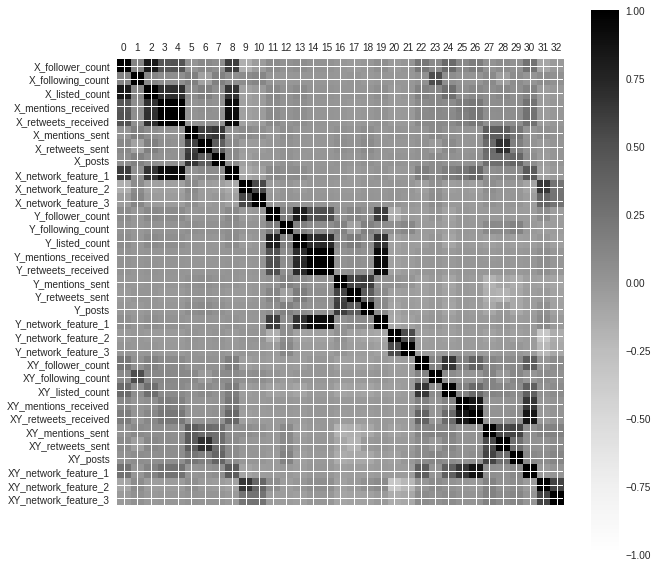

In [45]:
# Plotting a correlation matrix to check if any features can be removed to improve accuracy
correlations = train_X.corr()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,33,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(train_X.columns)
plt.show()

In [0]:
# Deleting columns with high correlation

del(train_X['X_listed_count'])
del(train_X['Y_listed_count'])
del(train_X['X_mentions_received'])
del(train_X['Y_mentions_received'])
del(train_X['X_network_feature_1'])
del(train_X['Y_network_feature_1'])
del(train_X['XY_retweets_received'])
del(train_X['XY_retweets_sent'])
del(train_X['XY_network_feature_1'])

del(test['X_listed_count'])
del(test['Y_listed_count'])
del(test['X_mentions_received'])
del(test['Y_mentions_received'])
del(test['X_network_feature_1'])
del(test['Y_network_feature_1'])
del(test['XY_retweets_received'])
del(test['XY_retweets_sent'])
del(test['XY_network_feature_1'])

In [0]:
# Creating a neural network model
def classification_model():
  
  # create model
  model = Sequential()
  model.add(Dense(10, activation = 'relu', input_shape = (24,)))
  model.add(Dropout(0.35))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dropout(0.35))
  model.add(Dense(1, activation = 'sigmoid'))
    
  # compile model
  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [48]:
# Standardizing all values in each column
sc = StandardScaler()
X_train_std = sc.fit_transform(train_X)
test_std = sc.transform(test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
%%capture 

# Splitting the dataset into Training and Validation data
nfolds = 5
X_train, X_val, y_train, y_val = train_test_split(X_train_std, train_y)

# Building the Neural Network Model
model1 = classification_model()

# Building the Decision Tree Classifier
parameters = {'min_samples_split' : range(10,500,20), 'max_depth': range(1,20,2)}
clf_tree = DecisionTreeClassifier()
model2 = GridSearchCV(clf_tree, parameters, cv = nfolds, refit = True)

# Building the SVM Model
Cs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
gammas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
model3 = GridSearchCV(SVC(kernel = 'rbf', probability = True), param_grid, cv = nfolds, refit = True)

# BUilding the Logistic Regression Model
C_values = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
C_grid = {'C': C_values}
logReg = LogisticRegression(penalty = 'l1', random_state = 7)
model4 = GridSearchCV(logReg, C_grid, cv = nfolds, refit = True)

# fit the model
model1.fit(X_train, y_train, epochs=1000, batch_size=32)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train.values.ravel())
model4.fit(X_train,y_train)

In [50]:
# Check the Training Accuracy
pred1 = model1.predict_proba(X_train)
pred2 = model2.predict_proba(X_train)
pred3 = model3.predict_proba(X_train)
pred4 = model4.predict_proba(X_train)

finalpred = (pred1[:, 0] + pred2[:, 1] + pred3[:, 1] + pred4[:, 1]) / 4

finalpred = (finalpred > 0.5) + 0
finalpred = finalpred.transpose()

print(accuracy_score(y_train, finalpred))

0.7968519429414658


In [51]:
# Check the Validation Accuracy
pred1 = model1.predict_proba(X_val)
pred2 = model2.predict_proba(X_val)
pred3 = model3.predict_proba(X_val)
pred4 = model4.predict_proba(X_val)

finalpred = (pred1[:, 0] + pred2[:, 1] + pred3[:, 1] + pred4[:, 1]) / 4

finalpred = (finalpred > 0.5) + 0
finalpred = finalpred.transpose()

print(accuracy_score(y_val, finalpred))

0.7640117994100295


In [0]:
# Was used to check the perfect combination of Neural network

# tr.history.keys()
# summarize history for accuracy
# plt.plot(tr.history['acc'])
# plt.plot(tr.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
# plt.plot(tr.history['loss'])
# plt.plot(tr.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [0]:
# Prediciton on Test Data

pred1=model1.predict_proba(test_std)
pred2=model2.predict_proba(test_std)
pred3=model3.predict_proba(test_std)
pred4=model4.predict_proba(test_std)

finalpred = (pred1[:, 0] + pred2[:, 1] + pred3[:, 1] + pred4[:, 1]) / 4

finalpred = (finalpred > 0.5) + 0
finalpred = finalpred.transpose()

In [0]:
final =  pd.DataFrame({'X_social_than_Y?': finalpred})

In [0]:
final.to_csv('submission.csv', sep='\t', index = False)

In [0]:
# Download file from Colab Workspace to PC
from google.colab import files
files.download("submission.csv")